# **Project#2: Making Static and interactive Data visualization**📊

In [1]:
import pandas as pd

In [6]:
#reading the csv file
df_population_raw=pd.read_csv("sample_data/population_total.csv")

#show the dataframe loaded
df_population_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [10]:
#lets see kenya
df_population_raw[df_population_raw['country']=="Kenya"]

,country,year,population
46,Kenya,2020.0,53771296.0
47,Kenya,2019.0,52573973.0
61,Kenya,2018.0,51392565.0
62,Kenya,2017.0,50221142.0
63,Kenya,2016.0,49051534.0
82,Kenya,2015.0,47878336.0
83,Kenya,2010.0,42030676.0
114,Kenya,2005.0,36624895.0
115,Kenya,2000.0,31964557.0
116,Kenya,1995.0,27768296.0


**1 Making a Pivot Table**

pivot(): Returns reshaped DataFrame organized by given index/column values("pivot without aggregation)

In [12]:
#droping null values
df_population_raw.dropna(inplace=True)

In [14]:
#making a pivot table
df_pivot=df_population_raw.pivot(index="year",
                        columns="country",
                        values="population"
                        )

In [16]:
#lets select some countries. This will be important in our visualization. The countries now are columns
df_pivot=df_pivot[['United States', 'India', 'China', 'Indonesia', 'Brazil']]

In [17]:
 #show the new table
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


In [28]:
#show for 1955 and for USA
df_pivot.loc[1955.0, ['United States']]

,1955.0
country,
United States,171685336.0


**# Data Visualization with Pandas**



**LinePlot**

<Axes: title={'center': 'Population(1955-2020)'}, xlabel='Year', ylabel='Population'>

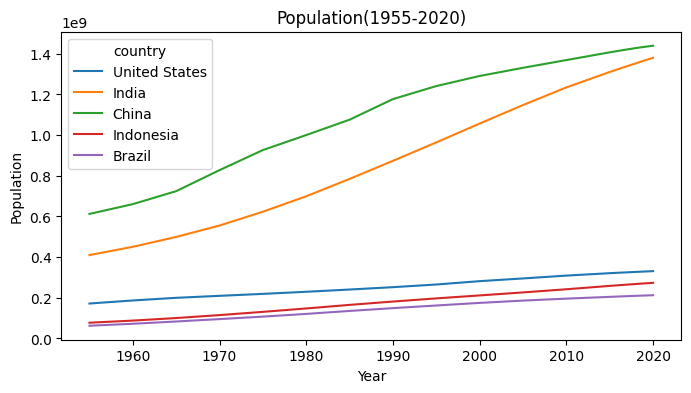

In [31]:
df_pivot.plot(kind='line',xlabel='Year', ylabel="Population", title="Population(1955-2020)", figsize=(8,4))

**Barplot**

***3.1 SIngle Barplot***


In [46]:
#selecing only one year(2020)
df_pivot_2020=df_pivot[df_pivot.index.isin([2020.0])]

In [47]:
#show the new df for 2020
df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [48]:
#N/B to make barplot put text  data inthe index
#we use transpose dataframe from rows to columns or viceversa
df_pivot_2020=df_pivot_2020.T

In [49]:
#show
df_pivot_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Brazil,2.125594e+08


<Axes: title={'center': 'Population 2020'}, xlabel='Year', ylabel='Population'>

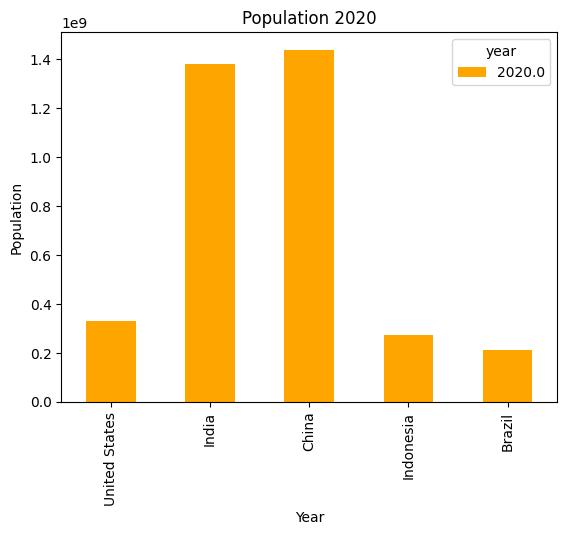

In [50]:
#making the barplot now
df_pivot_2020.plot(kind='bar', color='orange', xlabel='Year', ylabel="Population", title="Population 2020")

***3.2 Barplot grouped by "n" variables***

In [44]:
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


In [52]:
#selecting a few years
df_pivot_sample=df_pivot[df_pivot.index.isin([1980, 1990, 2000, 2010,2020])]

In [53]:
#show the df
df_pivot_sample

country,United States,India,China,Indonesia,Brazil
year,,,,,
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
2000.0,281710909.0,1.056576e+09,1.290551e+09,211513823.0,174790340.0
2010.0,309011475.0,1.234281e+09,1.368811e+09,241834215.0,195713635.0
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


<Axes: xlabel='Year', ylabel='Population'>

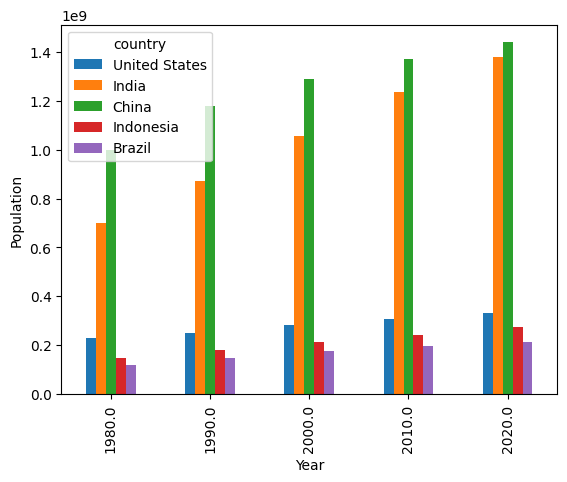

In [55]:
#making grouped barplot
df_pivot_sample.plot(kind='bar',xlabel='Year', ylabel="Population")

**4 Piechart**

In [57]:
#changing column name
df_pivot_2020.rename(columns={2020:'2020'}, inplace=True)

<Axes: title={'center': 'Population in 2020(%)'}, ylabel='2020'>

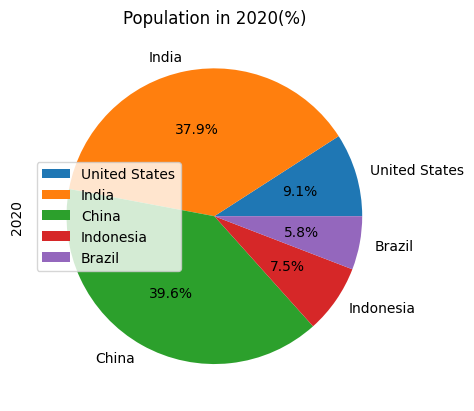

In [62]:
#making the plot- inthe y argument add column that has the argument
df_pivot_2020.plot(kind='pie', y='2020', title='Population in 2020(%)',autopct='%1.1f%%')

**5 Boxplot**

**5.1 Single Boxplot**

In [63]:
df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


<Axes: ylabel='Population'>

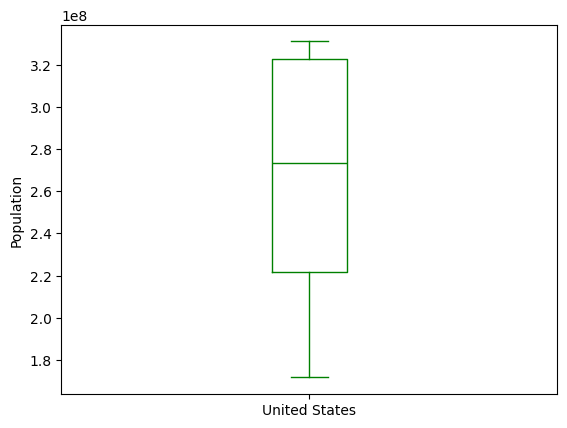

In [66]:
df_pivot['United States'].plot(kind='box', color='green', ylabel='Population')

**5.2 Mutiple Boxplot**

<Axes: ylabel='Population'>

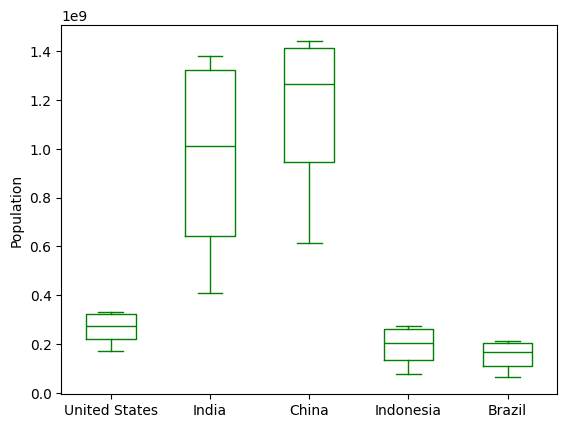

In [68]:
df_pivot.plot(kind='box', color='green', ylabel='Population')

**6 Histogram**

<Axes: ylabel='Frequency'>

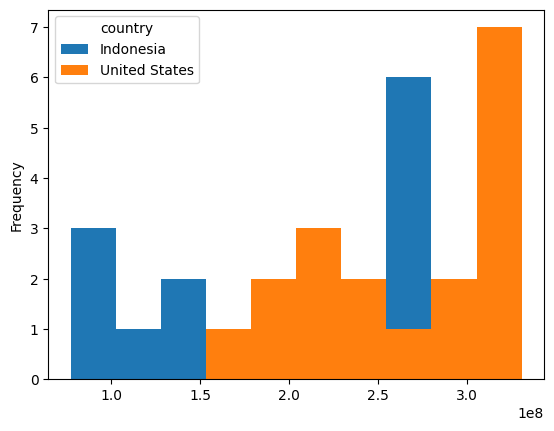

In [72]:
df_pivot[['Indonesia', "United States"]].plot(kind='hist')

**7 ScatterPlot**

In [74]:
#let us select 5 countries in our initial dataframe
df_sample=df_population_raw[df_population_raw['country'].isin(['United States', 'India', 'China', 'Indonesia', 'Brazil'])]

In [75]:
#show the dataframe
df_sample

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


<Axes: xlabel='year', ylabel='population'>

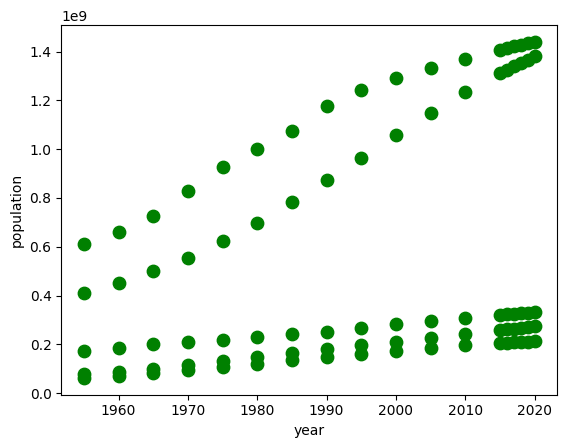

In [78]:
#creating the plot
df_sample.plot(kind='scatter',
               x='year',
               y='population',
               s=80,
               color='green'
               )